In [1]:
from aocd import get_data

In [23]:
data = get_data()

In [2]:
import numpy as np

In [158]:
data='''#...##.####.#.......#.##..##.#.
#.##.#..#..#...##..##.##.#.....
#..#####.#......#..#....#.###.#
...#.#.#...#..#.....#..#..#.#..
.#.....##..#...#..#.#...##.....
##.....#..........##..#......##
.##..##.#.#....##..##.......#..
#.##.##....###..#...##...##....
##.#.#............##..#...##..#
###..##.###.....#.##...####....
...##..#...##...##..#.#..#...#.
..#.#.##.#.#.#####.#....####.#.
#......###.##....#...#...#...##
.....#...#.#.#.#....#...#......
#..#.#.#..#....#..#...#..#..##.
#.....#..##.....#...###..#..#.#
.....####.#..#...##..#..#..#..#
..#.....#.#........#.#.##..####
.#.....##..#.##.....#...###....
###.###....#..#..#.....#####...
#..##.##..##.#.#....#.#......#.
.#....#.##..#.#.#.......##.....
##.##...#...#....###.#....#....
.....#.######.#.#..#..#.#.....#
.#..#.##.#....#.##..#.#...##..#
.##.###..#..#..#.###...#####.#.
#...#...........#.....#.......#
#....##.#.#..##...#..####...#..
#.####......#####.....#.##..#..
.#...#....#...##..##.#.#......#
#..###.....##.#.......#.##...##'''

In [138]:
data='''.#..##.###...#######
##.############..##.
.#.######.########.#
.###.#######.####.#.
#####.##.#.##.###.##
..#####..#.#########
####################
#.####....###.#.#.##
##.#################
#####.##.###..####..
..######..##.#######
####.##.####...##..#
.#####..#.######.###
##...#.##########...
#.##########.#######
.####.#.###.###.#.##
....##.##.###..#####
.#.#.###########.###
#.#.#.#####.####.###
###.##.####.##.#..##'''

In [159]:
def convert(data):
    mat = []
    for i, row in enumerate(data.splitlines()):
        for j, c in enumerate(row):
            if c == '#':
                mat.append((i,j))
    return np.asarray(mat)
mat = convert(data)                

In [160]:
def observables(dif):
    dif = np.asarray(sorted(dif, key=lambda x: x[0]**2 + x[1]**2))
    lengths = np.linalg.norm(dif, axis=1)
    col_rows = {}
    for i, r in enumerate(dif):
        r = tuple(r)
        if r in col_rows:
            continue
        lenghts_rel = np.linalg.norm(dif - r, axis=1)
        col = np.isclose(lenghts_rel + np.linalg.norm(r), lengths, atol=0, rtol=1e-9)
        col[i] = False
        if col.any():
            for col_r in dif[col]:
                col_rows[tuple(col_r)] = r
    return len(dif) - len(col_rows), col_rows

In [161]:
obs_cnts = {}
for i in range(len(mat)):
    dif = mat - mat[i,:]
    dif = np.vstack([dif[:i,:], dif[i+1:,:]])    
    obs_cnts[tuple(mat[i,:])] = observables(dif)
max_r = max(obs_cnts, key=lambda x: obs_cnts[x][0])
print(max_r, obs_cnts[max_r][0])

(22, 17) 288


# part 2

In [162]:
dif = mat - max_r

In [163]:
non_masked_dif = []
for r in dif:
    if tuple(r) not in list(obs_cnts[max_r][1].keys()):
        non_masked_dif.append(r)

In [164]:
non_masked_dif = np.asarray(non_masked_dif)

In [165]:
angles = np.arctan2(non_masked_dif[:,0], non_masked_dif[:,1]) + np.pi/2

In [166]:
angles = np.where(angles < 0, 2*np.pi + angles, angles)

In [169]:
(non_masked_dif[np.argsort(angles)] + max_r)[200]

array([16,  6])

In [170]:
6*100 + 16

616

In [168]:
13*100 + 20

1320

In [29]:
masked_dots = np.asarray(obs_cnts[max_r][1])

masked_dots_coords = np.asarray(list(obs_cnts[max_r][1].keys()))

In [30]:
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource

output_notebook()

Loading BokehJS ...

In [31]:
source = ColumnDataSource(data=dict(
    x=masked_dots_coords[:,0],
    y=masked_dots_coords[:,1],
    desc=[(i,j) for i,j in obs_cnts[max_r][1].values()],
))

TOOLTIPS = [
    ("(x,y)", "(@x, @y)"),
    ("desc", "@desc"),
]

p = figure(plot_width=500, plot_height=500, tooltips=TOOLTIPS,)

p.circle('x', 'y', size=8, source=source)
p.circle(0,0, size=5,color='red')
p.circle(mat[:,0]-max_r[0], mat[:,1]-max_r[1], size=5, alpha=.1)

show(p)

In [42]:
np.isclose(22.02292007945855, 22.02271554554524)

True

In [171]:
import math

In [172]:
math.sin(math.pi*0.4)

0.9510565162951535

In [173]:
math.cos(math.pi*0.4)

0.30901699437494745

In [180]:
math.acos(math.cos(math.pi))

3.141592653589793

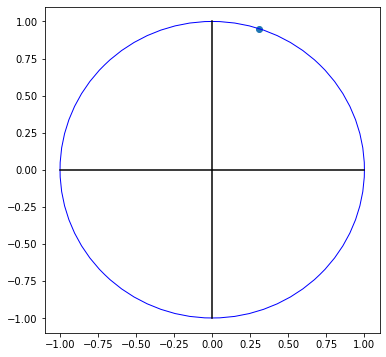

In [183]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
ax.add_patch(circ)

ax.plot([-1, 1],[0, 0], c='k')
ax.plot([0, 0],[-1, 1], c='k')
ax.scatter(math.cos(math.pi*0.4), math.sin(math.pi*0.4))

#ax.scatter(math.cos(math.pi*0.4), math.sin(math.pi*0.4))